In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV

In [2]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [3]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [4]:
X_mid, X_test_sc, y_mid, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [5]:
X_train_sc, X_val_sc, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train_sc)
X_train = scaler.transform(X_train_sc)
X_val = scaler.transform(X_val_sc)
X_test = scaler.transform(X_test_sc)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


### Logistic Regression ###

In [7]:
logistic = LogisticRegression()

In [8]:
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
logistic_pred = logistic.predict(X_val)

In [10]:
print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

Logistic Results:
[[11358  7628]
 [ 5043 17381]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.69      0.78      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.69      0.69     41410
weighted avg       0.69      0.69      0.69     41410



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic score: 0.694011


In [11]:
logistic_y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, logistic_y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

0.7579163378134044


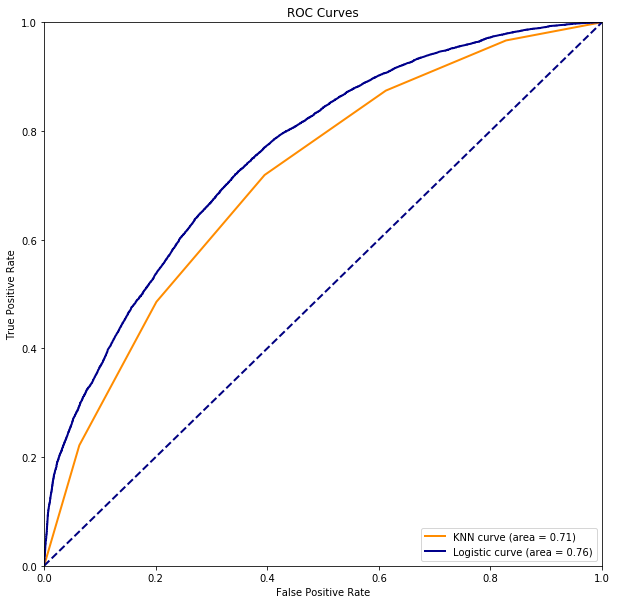

In [19]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes ###

In [29]:
bernoulli = naive_bayes.BernoulliNB()

In [35]:
bernoulli.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [36]:
bernoulli_pred = bernoulli.predict(X_val)

In [37]:
print('Bernoulli Results:')
print(confusion_matrix(y_val,bernoulli_pred))
print(classification_report(y_val, bernoulli_pred))
print('Bernoulli score: %f' % bernoulli.fit(X_train, y_train).score(X_val, y_val))

Bernoulli Results:
[[10359  8627]
 [ 4491 17933]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61     18986
           1       0.68      0.80      0.73     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.69      0.67      0.67     41410
weighted avg       0.69      0.68      0.68     41410

Bernoulli score: 0.683217


In [38]:
bernoulli_y_score = bernoulli.predict_proba(X_val)[:, 1]
bernoulli_fpr, bernoulli_tpr, auc_thresholds = roc_curve(y_val, bernoulli_y_score)
roc_auc_bernoulli = auc(bernoulli_fpr, bernoulli_tpr)
print(auc(bernoulli_fpr, bernoulli_tpr))

0.7456059063499068


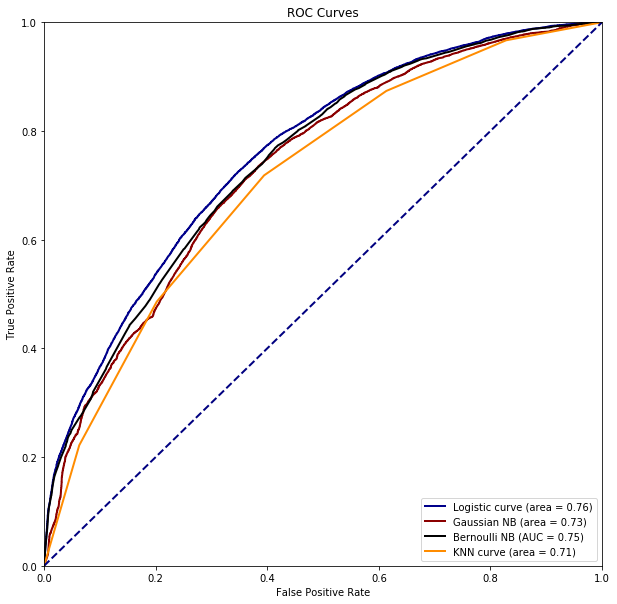

In [39]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Random Forest ###

In [19]:
forest = RandomForestClassifier()

In [20]:
forest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
forest_pred = forest.predict(X_val)

In [22]:
print('Forest Results:')
print(confusion_matrix(y_val, tree_pred))
print(classification_report(y_val, forest_pred))
print('Forest score: %f' % forest.fit(X_train, y_train).score(X_val, y_val))

Forest Results:
[[12038  6948]
 [ 8099 14325]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     18986
           1       0.69      0.68      0.69     22424

   micro avg       0.66      0.66      0.66     41410
   macro avg       0.66      0.66      0.66     41410
weighted avg       0.66      0.66      0.66     41410

Forest score: 0.665926


In [23]:
forest_y_score = forest.predict_proba(X_val)[:, 1]
forest_fpr, forest_tpr, auc_thresholds = roc_curve(y_val, forest_y_score)
roc_auc_forest = auc(forest_fpr, forest_tpr)
print(auc(forest_fpr, forest_tpr))

0.7214949249177314


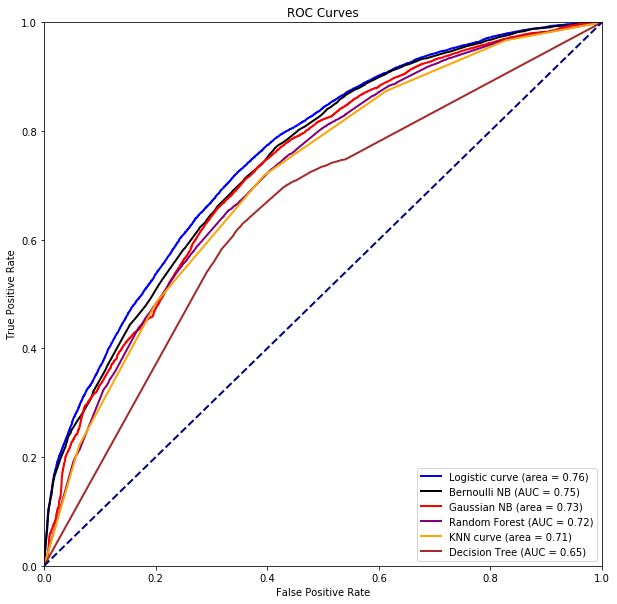

In [51]:
plt.figure(figsize=(10,10))
lw = 2

plt.plot(logistic_fpr, logistic_tpr, color='blue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(gaussian_fpr, gaussian_tpr, color='red',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(forest_fpr, forest_tpr, color='purple',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(knn_fpr, knn_tpr, color='orange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [52]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Initializing The Grid Search CV for the best performing models ###

In [ ]:
#KNN Results:      
#[[11500  7486]
# [ 6318 16106]]

In [ ]:
#Logistic Results: # second best AUC after XGBoost
#[[11358  7628]
 #[ 5051 17373]]

In [ ]:
#Gaussian Results:
#[[ 8234 10752]
# [ 3018 19406]]

In [ ]:
#Bernoulli Results: # third best AUC
#[[10359  8627]
# [ 4491 17933]]

In [ ]:
#Tree Results: 
#[[12038  6948]
 #[ 8099 14325]]

In [ ]:
#Forest Results: #Lowest False Positive Rate
#[[12038  6948]
 #[ 8099 14325]]

In [ ]:
#SVC Results:  
#[[11138  7848]
# [ 5695 16729]]

In [46]:
Dummy = DummyClassifier()
Dummy.fit(X_train, y_train)
Dummy_pred = Dummy.predict(X_val) 

In [47]:
print('Dummy Results:')
print(confusion_matrix(y_val, Dummy_pred))
print(classification_report(y_val, Dummy_pred))
print('SVC score: %f' % Dummy.fit(X_train, y_train).score(X_val, y_val))

Dummy Results:
[[ 8596 10390]
 [10374 12050]]
              precision    recall  f1-score   support

           0       0.45      0.45      0.45     18986
           1       0.54      0.54      0.54     22424

   micro avg       0.50      0.50      0.50     41410
   macro avg       0.50      0.50      0.50     41410
weighted avg       0.50      0.50      0.50     41410

SVC score: 0.502560


In [48]:
Dummy_y_score = Dummy.predict_proba(X_val)[:, 1]

In [49]:
Dummy_fpr, Dummy_tpr, auc_thresholds = roc_curve(y_val, Dummy_y_score)
roc_auc_Dummy = auc(Dummy_fpr, Dummy_tpr)
print(auc(Dummy_fpr, Dummy_tpr))

0.5024567715723763


### Logistic Regression Grid Search CV ###

In [75]:
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100,1000]
param_grid = dict(C=C, penalty=penalty)

In [80]:
logistic_grid_search = LogisticRegression()
logistic_grid = GridSearchCV(logistic_grid_search, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1, refit = True)
logistic_grid.fit(X_train, y_train)
logistic_grid_predictions = logistic_grid.predict(X_val)
logistic_grid_best_params = logistic_grid.best_params_
logistic_grid_best_estimator = logistic_grid.best_estimator_
logistic_grid_best_cm = confusion_matrix(y_val,logistic_grid_predictions)
logistic_grid_best_cr = classification_report(y_val,logistic_grid_predictions)
print(logistic_grid_best_params, logistic_grid_best_estimator, logistic_grid_best_cm, logistic_grid_best_cr)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   21.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1000, 'penalty': 'l1'} LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) [[11338  7648]
 [ 5026 17398]]               precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.69      0.78      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.69      0.69     41410
weighted avg       0.69      0.69      0.69     41410



In [77]:
logistic_grid_y_score = logistic_grid.predict_proba(X_val)[:, 1]

In [78]:
logistic_grid_fpr, logistic_grid_tpr, auc_thresholds = roc_curve(y_val, logistic_grid_y_score)
roc_auc_logistic_grid = auc(logistic_grid_fpr, logistic_grid_tpr)
print(auc(logistic_grid_fpr, logistic_grid_tpr))

0.758307969306035


### BernoulliNB GridSearchCV ###

In [82]:
alpha = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
param_grid = dict(alpha=alpha)

In [84]:
bernoulli_grid_search = naive_bayes.BernoulliNB()
bernoulli_grid = GridSearchCV(bernoulli_grid_search, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1, refit = True)
bernoulli_grid.fit(X_train, y_train)
bernoulli_grid_predictions = bernoulli_grid.predict(X_val)
bernoulli_grid_best_params = bernoulli_grid.best_params_
bernoulli_grid_best_estimator = bernoulli_grid.best_estimator_
bernoulli_grid_best_cm = confusion_matrix(y_val,bernoulli_grid_predictions)
bernoulli_grid_best_cr = classification_report(y_val,bernoulli_grid_predictions)
print(bernoulli_grid_best_params, bernoulli_grid_best_estimator, bernoulli_grid_best_cm, bernoulli_grid_best_cr)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s


{'alpha': 1.0} BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) [[10359  8627]
 [ 4491 17933]]               precision    recall  f1-score   support

           0       0.70      0.55      0.61     18986
           1       0.68      0.80      0.73     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.69      0.67      0.67     41410
weighted avg       0.69      0.68      0.68     41410



[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.5s finished


In [85]:
bernoulli_grid_y_score = bernoulli_grid.predict_proba(X_val)[:, 1]

In [86]:
bernoulli_grid_fpr, bernoulli_grid_tpr, auc_thresholds = roc_curve(y_val, bernoulli_grid_y_score)
roc_auc_bernoulli_grid = auc(bernoulli_grid_fpr, bernoulli_grid_tpr)
print(auc(bernoulli_grid_fpr, bernoulli_grid_tpr))

0.7456059063499068


### Random Forest GridSearchCV ###

In [90]:
n_estimators = [10,100,200,300,400,500,600,1000]
criterion = ['gini', 'entropy']
param_grid = dict(n_estimators = n_estimators, criterion = criterion)
random_forest_grid_search = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest_grid_search, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
random_forest_grid.fit(X_train, y_train)
random_forest_grid_predictions = random_forest_grid.predict(X_val)
random_forest_best_params = random_forest_grid.best_params_
random_forest_best_estimator = random_forest_grid.best_estimator_
random_forest_best_cm = confusion_matrix(y_val,random_forest_grid_predictions)
random_forest_best_cr = classification_report(y_val,random_forest_grid_predictions)
print(random_forest_best_params, random_forest_best_estimator, random_forest_best_cm, random_forest_best_cr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 96.2min finished


{'criterion': 'entropy', 'n_estimators': 1000} RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) [[11830  7156]
 [ 6247 16177]]               precision    recall  f1-score   support

           0       0.65      0.62      0.64     18986
           1       0.69      0.72      0.71     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.67      0.67      0.67     41410
weighted avg       0.68      0.68      0.68     41410



In [91]:
random_forest_y_score = random_forest_grid.predict_proba(X_val)[:, 1]

In [93]:
random_forest_grid_fpr, random_forest_grid_tpr, auc_thresholds = roc_curve(y_val, random_forest_y_score)
roc_auc_random_forest_grid = auc(random_forest_grid_fpr, random_forest_grid_tpr)
print(auc(random_forest_grid_fpr, random_forest_grid_tpr))

0.7343081807861955
